In [1]:
import requests
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import jieba
import jieba.analyse
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://www.cupoy.com/MixNewsAction.do?op=getBucketGroups&nationid=TW&len=20"
res = requests.get(url)
resjson= res.json()
resjson
data = [[d['name'], d['groupid']] for d in resjson]
df_groupid = pd.DataFrame(data, columns=['name', 'groupid'])
df_groupid

,name,groupid
0,科技,tech_tw
1,商業,business_tw
2,生活,life_tw
3,遊戲,Game_tw
4,運動,Sports_tw
5,設計,design_tw
6,閱讀,Reading_tw
7,3C達人,3CExpert_tw
8,御宅學園,GamePlayer_tw
9,親子家庭,Babyhome_tw


In [3]:
def GetData(tag):
    url = f"https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNewsByBucketGroup&groupid={tag}&startNewsID=0&len=500"
    res = requests.get(url)
    resjson= res.json()
    columns = ['bucketgrpids']
    data = [[d[c] for c in columns] for d in resjson['items']]
    df = pd.DataFrame(data, columns=columns)
    df['groupid']=tag
    return df


In [4]:
def GetClassName(df):
    for index in df_groupid.index:
        e_name = df_groupid.loc[ index, 'groupid']
        c_name = df_groupid.loc[ index, 'name']
        df[c_name] = df['bucketgrpids'].apply(lambda x: 1 if e_name in x else 0)
    return df

In [5]:
data=[]
for tag in df_groupid['groupid']:
    df = GetData(tag)
    df2 = GetClassName(df)
    y = [df2[d].sum() for d in df_groupid['name']]
    data.append(y)

In [6]:
data

[[500, 119, 20, 14, 2, 4, 0, 122, 19, 11, 6, 8, 106, 19, 13, 4],
 [44, 500, 42, 0, 1, 1, 2, 14, 1, 40, 2, 15, 433, 73, 31, 8],
 [5, 14, 500, 1, 7, 2, 2, 2, 24, 445, 25, 31, 10, 1, 123, 65],
 [28, 2, 9, 500, 1, 1, 0, 21, 500, 2, 7, 0, 1, 1, 14, 5],
 [0, 3, 28, 0, 500, 0, 0, 0, 0, 12, 0, 31, 3, 0, 12, 0],
 [14, 32, 39, 3, 0, 500, 0, 11, 8, 32, 493, 0, 14, 11, 28, 29],
 [5, 42, 63, 2, 7, 1, 500, 0, 31, 28, 30, 8, 30, 11, 15, 3],
 [500, 63, 30, 16, 0, 3, 0, 500, 25, 5, 10, 2, 31, 27, 24, 20],
 [33, 4, 107, 402, 1, 2, 2, 23, 500, 15, 105, 5, 2, 2, 31, 12],
 [4, 12, 500, 0, 2, 1, 2, 1, 5, 500, 6, 26, 8, 1, 96, 49],
 [15, 25, 387, 14, 0, 125, 2, 10, 378, 39, 500, 7, 14, 8, 62, 25],
 [11, 19, 500, 0, 12, 0, 0, 7, 6, 492, 6, 500, 15, 1, 492, 3],
 [42, 500, 44, 0, 1, 2, 2, 20, 1, 43, 2, 14, 500, 16, 27, 6],
 [13, 500, 14, 1, 0, 0, 0, 4, 3, 11, 2, 3, 108, 500, 10, 6],
 [12, 19, 500, 0, 4, 3, 2, 8, 5, 465, 6, 351, 9, 4, 500, 123],
 [57, 19, 500, 0, 0, 4, 0, 56, 7, 349, 8, 11, 5, 7, 500, 500]]

In [7]:
tag_number = np.array(data)
tag_percent = tag_number/500
tag_percent

array([[1.   , 0.238, 0.04 , 0.028, 0.004, 0.008, 0.   , 0.244, 0.038,
        0.022, 0.012, 0.016, 0.212, 0.038, 0.026, 0.008],
       [0.088, 1.   , 0.084, 0.   , 0.002, 0.002, 0.004, 0.028, 0.002,
        0.08 , 0.004, 0.03 , 0.866, 0.146, 0.062, 0.016],
       [0.01 , 0.028, 1.   , 0.002, 0.014, 0.004, 0.004, 0.004, 0.048,
        0.89 , 0.05 , 0.062, 0.02 , 0.002, 0.246, 0.13 ],
       [0.056, 0.004, 0.018, 1.   , 0.002, 0.002, 0.   , 0.042, 1.   ,
        0.004, 0.014, 0.   , 0.002, 0.002, 0.028, 0.01 ],
       [0.   , 0.006, 0.056, 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.024, 0.   , 0.062, 0.006, 0.   , 0.024, 0.   ],
       [0.028, 0.064, 0.078, 0.006, 0.   , 1.   , 0.   , 0.022, 0.016,
        0.064, 0.986, 0.   , 0.028, 0.022, 0.056, 0.058],
       [0.01 , 0.084, 0.126, 0.004, 0.014, 0.002, 1.   , 0.   , 0.062,
        0.056, 0.06 , 0.016, 0.06 , 0.022, 0.03 , 0.006],
       [1.   , 0.126, 0.06 , 0.032, 0.   , 0.006, 0.   , 1.   , 0.05 ,
        0.01 , 0.02 , 0.00

In [8]:
tags= [tag for tag in df_groupid['name']]
tags

['科技',
 '商業',
 '生活',
 '遊戲',
 '運動',
 '設計',
 '閱讀',
 '3C達人',
 '御宅學園',
 '親子家庭',
 '文青聚落',
 '健身瘦身',
 '職場白領',
 '國際財經',
 '享樂女性',
 '城市食旅']

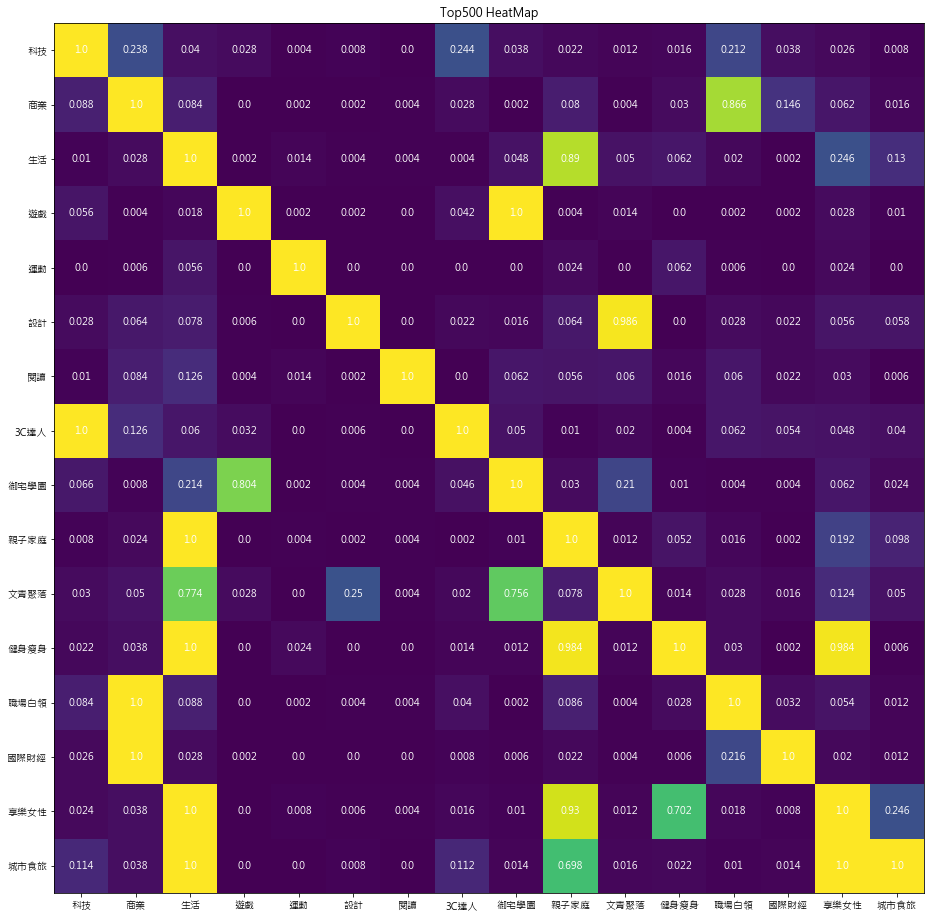

In [9]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# sphinx_gallery_thumbnail_number = 2


fig, ax = plt.subplots()
im = ax.imshow(tag_percent)

# We want to show all ticks...
ax.set_xticks(np.arange(len(tags)))
ax.set_yticks(np.arange(len(tags)))
# ... and label them with the respective list entries
ax.set_xticklabels(tags)
ax.set_yticklabels(tags)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(tags)):
    for j in range(len(tags)):
        text = ax.text(j, i, tag_percent[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Top500 HeatMap")
fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.show()